In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample_mkt_data_final.csv', low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
0,0,0,Safari,NaN,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910
1,1,1,Chrome,NaN,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299
2,2,2,Chrome,NaN,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966
3,3,3,Chrome,NaN,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430
4,4,4,Chrome,NaN,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099


In [3]:
df.shape

(71812, 17)

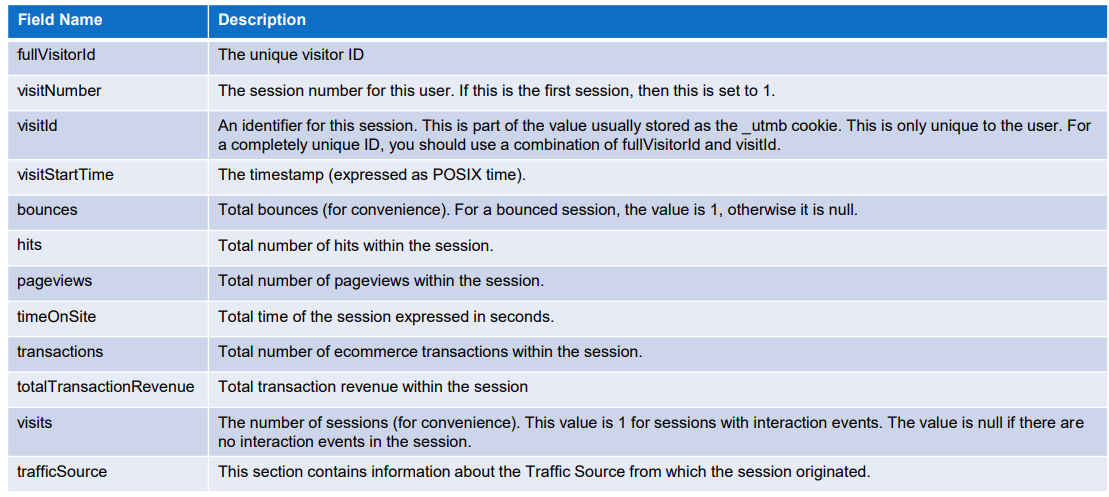

In [4]:
alist = ['Unnamed: 0.1','Unnamed: 0']
df = df.drop(columns=alist)

# KPI - DASHBOARD

### 1.Conversation Rate: 
Total number of sessions in which visitors make at least one transaction / Total number of Sessions


In [5]:
conversation = df['transactions'].count() / df['visits'].sum() *100
conversation

1.4356931989082604

### 2.bounce rate: 
Your site's Bounce Rate is the percentage of sessions that are bounces.

In [6]:
bounce_rate = df['bounces'].sum() / len(df['bounces'])*100
bounce_rate

50.69904751295048

### 3. Avg. session duration (seconds): 
The average time someone stayed on your site.

In [7]:
# trung bình timeonsite:   mean(timeonSite)
avg_ses_duration = df['timeOnSite'].mean()
avg_ses_duration

296.7820258474096

### 4.Page/session:
The average number of pages viewed per session.

In [8]:
page_session = df['pageviews']/df['visits']*100
page_session.mean()

376.83714970193324

### 5.Total sessions: 
the total number of sessions in month 

In [9]:
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
df['date'].head()

0   2017-07-13
1   2017-07-13
2   2017-07-13
3   2017-07-13
4   2017-07-13
Name: date, dtype: datetime64[ns]

In [10]:
df['yearmonth'] = df['date'].dt.strftime('%Y-%m')
df['yearmonth'].value_counts()

2017-07    71812
Name: yearmonth, dtype: int64

In [11]:
total_session_month = df[(df['yearmonth']=='2017-07')& (df['visits']==1)]['visits'].count()
total_session_month

71812

### 6.% new sessions: 
The estimated percentage of first-time sessions. 

In [12]:
visitNumber=1

### 7. Total Visitors
total number of visitors in month 

In [13]:
# số lượng revenue/visit = (sum-transactionreve)/sum
target_data = df[df['yearmonth']=='2017-07']

# calculate the total number of visitors
total_visitors = target_data["visits"].sum() 
total_visitors

71812

### 8.Total transactions:  
total number of transactions in month 

In [14]:
total_transaction= (df['transactions']).count()
total_transaction

1031

### 9.Total revenue: 
total transaction revenue in month 

In [15]:
total_revenue = df['transactionRevenue'].sum()
total_revenue

124499280000.0

### 10. % New versus returning visitors 

In [16]:
returning = df.assign(Occurence=np.where(~df['fullVisitorId'].duplicated(),'New','Existing'))
returning.head()

,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,yearmonth,Occurence
0,Safari,NaN,1,1499949144,1499949144,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910,2017-07,New
1,Chrome,NaN,1,1499948762,1499948762,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299,2017-07,New
2,Chrome,NaN,7,1499940578,1499940578,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966,2017-07,New
3,Chrome,NaN,1,1500000096,1500000096,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430,2017-07,New
4,Chrome,NaN,1,1499969958,1499969958,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099,2017-07,New


In [17]:
returning['Occurence'].value_counts(normalize = True)

New         0.815588
Existing    0.184412
Name: Occurence, dtype: float64

### 11. Avg. Transaction Value 

In [18]:
ATV = df['hits'].sum() / df['transactions'].sum()
ATV

302.32835820895525

# MAP

#  Số lượng truy cập(rời bỏ) theo giờ trong ngày 

In [19]:
df['time_start'] = pd.to_datetime(df['visitStartTime'],unit='s')
df['hour_start'] = df['time_start'].dt.hour
df.head()

,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,yearmonth,time_start,hour_start
0,Safari,NaN,1,1499949144,1499949144,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910,2017-07,2017-07-13 12:32:24,12
1,Chrome,NaN,1,1499948762,1499948762,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299,2017-07,2017-07-13 12:26:02,12
2,Chrome,NaN,7,1499940578,1499940578,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966,2017-07,2017-07-13 10:09:38,10
3,Chrome,NaN,1,1500000096,1500000096,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430,2017-07,2017-07-14 02:41:36,2
4,Chrome,NaN,1,1499969958,1499969958,2017-07-13,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099,2017-07,2017-07-13 18:19:18,18


In [20]:
df1 = df.groupby('hour_start')[['bounces']].count()

visit_time = df['hour_start'].value_counts().sort_index()
df1['visit_time'] = visit_time

df1['bounce_rate'] = df1['bounces'] / df1['visit_time'] * 100

df1

,bounces,visit_time,bounce_rate
hour_start,,,
0,1342,2827,47.470817
1,1317,2721,48.401323
2,1222,2659,45.957127
3,1254,2555,49.080235
4,1327,2640,50.265152
5,1267,2510,50.478088
6,1385,2545,54.420432
7,1415,2587,54.696560
8,1438,2494,57.658380


In [21]:
df1.to_excel(r'bounce_hour.xlsx', index=True)

# Tổng số lượng truy cập theo các ngày trong tháng(nếu thể hiện được ngày đó là thứ mấy trong tuần thì sẽ nhìn rõ pattern là lượng truy cập có đạt đỉnh vào một ngày nhất định nào trong tuần không?) 

In [22]:
df['weekday'] = df['date'].dt.strftime('%A')

In [23]:
df2 = df.groupby('weekday')[['visits']].count().sort_values(by = 'visits', ascending = False)
df2

,visits
weekday,
Monday,12542
Wednesday,10678
Thursday,10596
Tuesday,10008
Friday,9692
Sunday,9347
Saturday,8949


In [24]:
df2.to_excel(r'Weekday.xlsx', index=True)

# Biểu đồ biến động về tổng số transaction và tổng số revenue theo ngày(dual axis) 

In [35]:
df3 = df.groupby('weekday')[['transactions', 'transactionRevenue']].sum().apply(lambda s: s.apply('{0:.1f}'.format))
df3

,transactions,transactionRevenue
weekday,,
Friday,175.0,16881180000.0
Monday,217.0,26391710000.0
Saturday,70.0,4720230000.0
Sunday,93.0,7635890000.0
Thursday,189.0,19019510000.0
Tuesday,138.0,27993310000.0
Wednesday,190.0,21857450000.0


In [26]:
df3.to_excel(r'transweekday.xlsx', index=True)

# Biểu đồ thể hiện số lượng truy cập, tỷ lệ bounce rate của các source 

In [27]:
df4 = df.groupby('source')[['bounces']].count()
source_visit = df.groupby('source')['visits'].count()
df4['visits'] = source_visit
df4['bounce_rate'] = df4['bounces'] / df4['visits'] * 100
df4.head()

,bounces,visits,bounce_rate
source,,,
(direct),8606,19891,43.265799
Partners,936,1788,52.348993
adwords.google.com,7,16,43.750000
amp.reddit.com,1,2,50.000000
analytics.google.com,1064,1972,53.955375


# Biểu đồ thể hiện số lượng transactions của từng source 

In [29]:
df.groupby('source')[['transactions']].sum().sort_values(by = 'transactions', ascending = False)

,transactions
source,
(direct),684.0
google,360.0
sites.google.com,7.0
dfa,5.0
Partners,4.0
...,...
googleads.g.doubleclick.net,0.0
google.ru,0.0
google.nl,0.0


# Biểu đồ thể hiện conversion rate của từng source 

In [30]:
df5 = df.groupby('source')[['transactions']].count()
source_visit = df.groupby('source')['visits'].count()
df5['visits'] = source_visit
df5['conversion_rate'] = df5['transactions'] / df5['visits'] * 100
df5.sort_values(by = 'conversion_rate', ascending = False)

,transactions,visits,conversion_rate
source,,,
calendar.google.com,1,2,50.000000
outlook.live.com,1,10,10.000000
(direct),653,19891,3.282892
sites.google.com,7,230,3.043478
yahoo,3,100,3.000000
...,...,...,...
googleads.g.doubleclick.net,0,4,0.000000
google.ru,0,5,0.000000
google.nl,0,1,0.000000


In [37]:
combine_source = pd.merge(df4, df5, how='inner', left_on = 'source', right_on = 'source').sort_values(by = 'visits_x', ascending = False)
combine_source

,bounces,visits_x,bounce_rate,transactions,visits_y,conversion_rate
source,,,,,,
google,19798,38400,51.557292,351,38400,0.914062
(direct),8606,19891,43.265799,653,19891,3.282892
youtube.com,4238,6351,66.729649,1,6351,0.015746
analytics.google.com,1064,1972,53.955375,0,1972,0.000000
Partners,936,1788,52.348993,4,1788,0.223714
...,...,...,...,...,...,...
malaysia.search.yahoo.com,1,1,100.000000,0,1,0.000000
online.fullsail.edu,1,1,100.000000,0,1,0.000000
news.ycombinator.com,1,1,100.000000,0,1,0.000000


In [40]:
combine_source = combine_source.drop(columns='visits_y')

In [43]:
combine_source = combine_source.rename(columns={'visits_x':'visits'})

In [44]:
combine_source

,bounces,visits,bounce_rate,transactions,conversion_rate
source,,,,,
google,19798,38400,51.557292,351,0.914062
(direct),8606,19891,43.265799,653,3.282892
youtube.com,4238,6351,66.729649,1,0.015746
analytics.google.com,1064,1972,53.955375,0,0.000000
Partners,936,1788,52.348993,4,0.223714
...,...,...,...,...,...
malaysia.search.yahoo.com,1,1,100.000000,0,0.000000
online.fullsail.edu,1,1,100.000000,0,0.000000
news.ycombinator.com,1,1,100.000000,0,0.000000


In [45]:
combine_source.to_excel(r'combine.xlsx', index=True)